# Linear Regression Using Gradient Descent
### *TEAM MEMBERS*
### KISHORE BALAJI   CB.SC.U4AIE23139
### KOUSHAL REDDY M  CB.SC.U4AIE23145
### NAVEEN BABU M S  CB.SC.U4AIE23153
### SAI CHARAN M     CB.SC.U4AIE23143



## Introduction

Linear regression is one of the simplest yet powerful algorithms in machine learning, used extensively in statistical modeling and predictive analytics. It aims to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

### Objectives
- Understand the mathematical foundations of linear regression.
- Implement the gradient descent algorithm to optimize the linear regression model.
- Evaluate the performance of the model using various metrics.

### Importance of Linear Regression
Linear regression serves as the foundation for many complex machine learning algorithms. It is interpretable and allows for a quick assessment of the relationships between variables, making it invaluable in fields ranging from finance to healthcare.


## Objective

Our goal is to develop a linear regression model to predict values using gradient descent and demonstrate the impact of regularization. The model will include:
- A Mean Squared Error (MSE) loss function.
- L2 regularization for added robustness.
- Visualizations of the cost function and prediction performance.

## Steps
1. Data Upload and Preview
2. Mathematical Explanation of Linear Regression and Gradient Descent
3. Model Implementation and Training
4. Visualization of Predictions and Cost Function
5. Model Evaluation Metrics


## Gradient Descent Optimization: A Visual and Practical Guide
*Understanding Gradient Descent with Interactive Steps*

## Introduction to Gradient Descent

Gradient descent is a powerful optimization algorithm used to minimize a function by iteratively moving towards the steepest descent direction. It is a cornerstone of many machine learning algorithms, particularly in training models like linear regression, neural networks, and more.

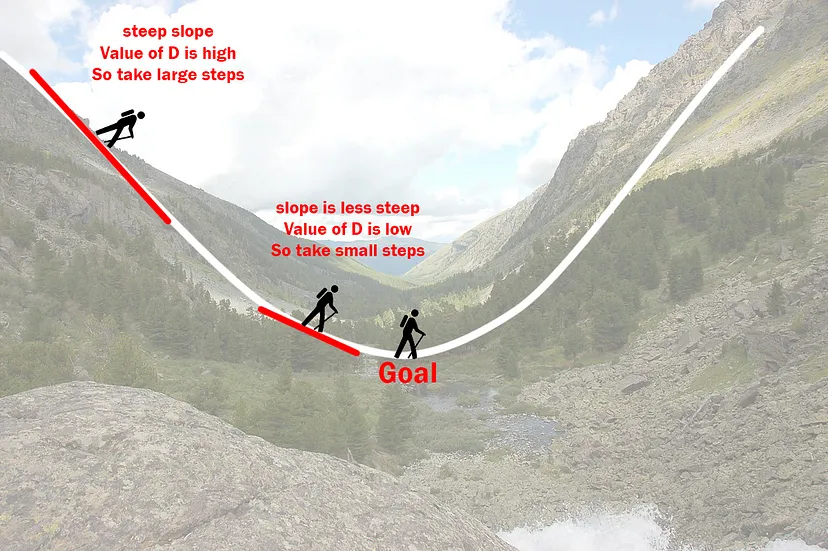

## Mathematical Proof for Linear Regression Gradient Descent

Linear regression aims to find the best-fitting line for a given set of data points by minimizing the Mean Squared Error (MSE) between the predicted and actual values. The linear model for a single feature can be written as:

\[
y = mx + c
\]

where:
- \( y \) is the predicted value,
- \( m \) is the slope (weight),
- \( x \) is the input feature, and
- \( c \) is the intercept (bias).

### Step 1: Define the Loss Function (Mean Squared Error)

To measure the performance of our model, we use the Mean Squared Error (MSE) as the loss function:


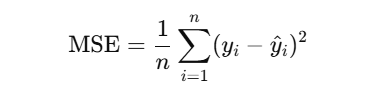
where:
- \( y_i \) is the actual value,
- \( {y}_i \) is the predicted value \( (mx_i + c) \),
- \( n \) is the number of data points.

### Step 2: Calculate the Gradients for Gradient Descent

Gradient Descent is used to minimize the MSE by updating the parameters \( m \) and \( c \). We need to find the partial derivatives of the loss function with respect to \( m \) and \( c \).


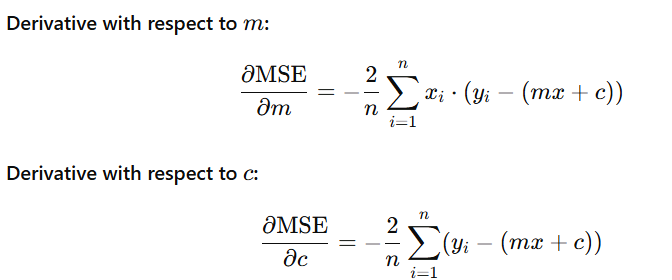

### Step 3: Update Rules for Gradient Descent
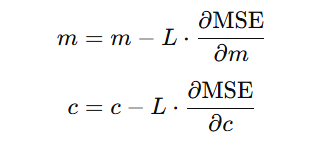
where `learning_rate` controls the step size of each update.

### L2 Regularization (Ridge Penalty)
### To prevent overfitting, L2 regularization adds a penalty term to the MSE:
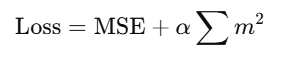

## Linear Regression with Gradient Descent and L2 Regularization
*Implementing Linear Regression from Scratch with Interactive Hyperparameters*

Welcome to this comprehensive guide on linear regression! We will:
1. Explore the theory behind linear regression and gradient descent.
2. Implement linear regression with L2 regularization.
3. Visualize model performance interactively with adjustable parameters.


In [1]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting graphs
import ipywidgets as widgets  # For interactive widgets
from IPython.display import display  # To display widgets and outputs
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting data

In [2]:
# Step 1: Upload the CSV file
data = pd.read_csv("data.csv")
print("Data Preview (first 5 rows):")
display(data.head())


Data Preview (first 5 rows):


,5.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [3]:
# Step 2: Define widgets for learning rate, epochs, and alpha (regularization strength)
learning_rate_slider = widgets.FloatSlider(value=0.001, min=0.000001, max=0.1, step=0.000001, description='Learning Rate:')
epochs_slider = widgets.IntSlider(value=1000, min=100, max=5000, step=100, description='Epochs:')
alpha_slider = widgets.FloatSlider(value=1.0, min=0.0, max=1.0, step=0.1, description='Alpha (Regularization):')


In [4]:
# Step 3: Implement Linear Regression with L2 Regularization
def linear_regression(X, Y, learning_rate, epochs, alpha=0.0):
    m = np.zeros(X.shape[1])  # Initialize weights
    c = 0  # Initialize bias
    n = len(Y)  # Number of samples
    costs = []  # Track cost values for each epoch

    for epoch in range(epochs):
        Y_pred = np.dot(X, m) + c  # Predicted values
        D_m = (-2/n) * np.dot(X.T, (Y - Y_pred)) + 2 * alpha * m  # Gradient for weights
        D_c = (-2/n) * np.sum(Y - Y_pred)  # Gradient for bias
        m -= learning_rate * D_m  # Update weights
        c -= learning_rate * D_c  # Update bias

        cost = np.mean((Y - Y_pred) ** 2) + alpha * np.sum(m**2)  # MSE + L2 cost
        costs.append(cost)

        if epoch % 100 == 0:  # Print cost at intervals
            print(f'Epoch {epoch}: Cost = {cost}')

    return m, c, costs


In [5]:
def visualize_linear_regression(learning_rate, epochs, alpha):
    X = data.iloc[:, :-1].values  # Features
    Y = data.iloc[:, -1].values   # Target
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    m, c, costs = linear_regression(X_train, Y_train, learning_rate, epochs, alpha)
    Y_pred = np.dot(X_test, m) + c
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, Y_test, color='blue', label='Actual Y vs X_test')
    plt.scatter(X_test, Y_pred, color='red', label='Predicted Y vs X_test')
    plt.plot([min(X_test), max(X_test)], [min(Y_pred), max(Y_pred)], color='green', linestyle='--', label='Ideal Fit')
    plt.xlabel('X_test')  
    plt.ylabel('Y Values')  
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), costs, label='Cost', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Epochs')
    plt.legend()
    plt.show()
    
    mae = np.mean(np.abs(Y_test - Y_pred))
    mse = np.mean((Y_test - Y_pred) ** 2)
    rmse = np.sqrt(mse)
    r_squared = 1 - (np.sum((Y_test - Y_pred) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

    print(f"Slope (m): {m}")
    print(f"Intercept (c): {c}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r_squared}")

In [6]:
# Step 5: Interactive widget to experiment with hyperparameters
interactive_plot = widgets.interactive(visualize_linear_regression,
                                        learning_rate=learning_rate_slider,
                                        epochs=epochs_slider,
                                        alpha=alpha_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.001, description='Learning Rate:', max=0.1, min=1e-06, step=1e-06), …